In [1]:
% matplotlib inline

import nibabel as nib
import numpy as np
import surfdist as sd
from surfdist import viz, surfdist, utils
import plotting_lighterbg as plot
import seaborn as sns
import pandas as pd
import glob, os
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set_context('poster')

/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
fsDir = "/afs/cbs.mpg.de/projects/mar004_lsd-lemon-preproc/freesurfer"
annotDir = '/scr/liberia1/data/Yeo_JNeurophysiol11_FreeSurfer'
docDir = '/afs/cbs.mpg.de/projects/mar005_lsd-lemon-surf/documents'

In [3]:
surf = nib.freesurfer.read_geometry('%s/fsaverage5/surf/lh.inflated' % fsDir)
labels_calc = nib.freesurfer.read_label('%s/fsaverage5/label/lh.S_calcarine.label' % fsDir)
labels_centr = nib.freesurfer.read_label('%s/fsaverage5/label/lh.S_central.label' % fsDir)
labels_transv = nib.freesurfer.read_label('%s/fsaverage5/label/lh.S_temporal_transverse.label' % fsDir)
cort = np.sort(nib.freesurfer.read_label('%s/fsaverage5/label/lh.cortex.label' % fsDir))
sulc = nib.freesurfer.read_morph_data('%s/fsaverage5/surf/lh.sulc' % fsDir)
curv = nib.freesurfer.read_morph_data('%s/fsaverage5/surf/lh.curv' % fsDir)

## get source regions of primary cortex

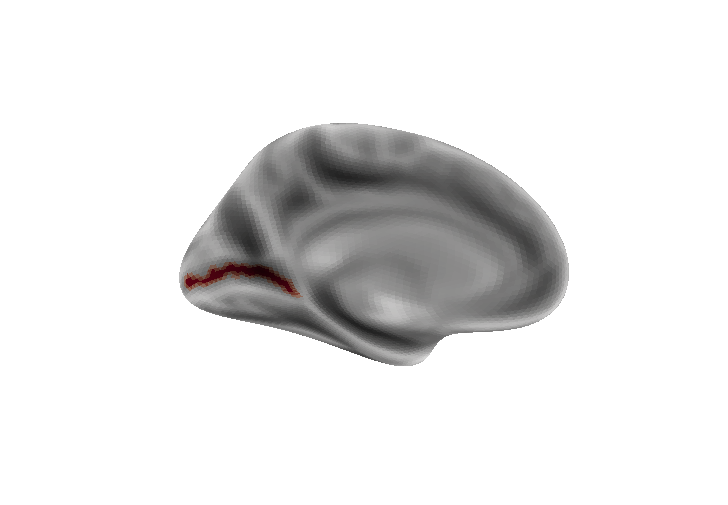

In [4]:
seeds_calc = np.zeros((10242))
seeds_calc[labels_calc[np.where(curv[labels_calc] > .1)[0]]] = 1

test = sd.viz.viz(surf[0], surf[1], seeds_calc, bg_map=sulc, bg_on_stat=True)

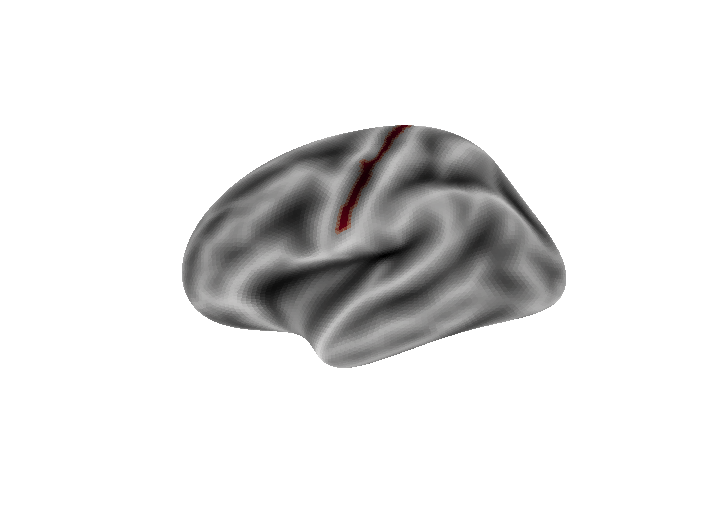

In [5]:
seeds_centr = np.zeros((10242))
seeds_centr[labels_centr[np.where(curv[labels_centr] > .1)[0]]] = 1

test = sd.viz.viz(surf[0], surf[1], seeds_centr, bg_map=sulc, bg_on_stat=True, azim=180)

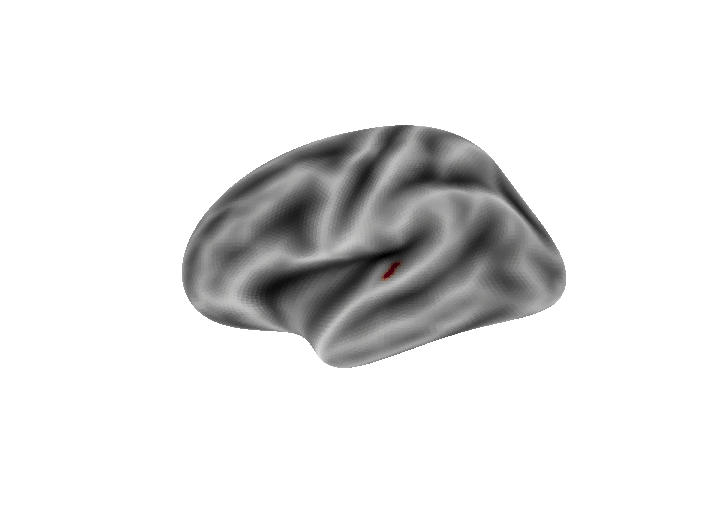

In [6]:
seeds_transv = np.zeros((10242))
seeds_transv[labels_transv[np.where(curv[labels_transv] > .1)[0]]] = 1

test = sd.viz.viz(surf[0], surf[1], seeds_transv, bg_map=sulc, bg_on_stat=True, azim=180)

## get distance to connected areas

In [7]:
# data: group average distance to connected areas
df = pd.read_pickle(max(glob.iglob('%s/data_grouplevel/lsd_data_grouplevel_20*.pkl' % docDir), 
                        key=os.path.getctime))
df = df[df['sample'] == 'LSD subjects']
#df = df[df['threshold'] == '98']


# group distances
gr_dist_lh = np.load('%s/data_grouplevel/lsd_geoDist_groupmean_lh.npy' % docDir)
renorm_lh = gr_dist_lh.max()

gr_dist_rh = np.load('%s/data_grouplevel/lsd_geoDist_groupmean_rh.npy' % docDir)
renorm_rh = gr_dist_rh.max()

gr_dist_lh_eucl = np.load('/scr/liberia1/data/distconnect/group_level/lsd_euclDist_groupmean_lh.npy')
renorm_lh_eucl = gr_dist_lh_eucl.max()

gr_dist_rh_eucl = np.load('/scr/liberia1/data/distconnect/group_level/lsd_euclDist_groupmean_rh.npy')
renorm_rh_eucl = gr_dist_rh_eucl.max()

# meanDist in mm
df_mm = df.copy()

#renorm dist-to-connected-areas
df_mm['mean distance (geodesic) - group mean'][df_mm['hemisphere']=='lh'] = df_mm['mean distance (geodesic) - group mean'][df_mm['hemisphere']=='lh'] * renorm_lh
df_mm['mean distance (geodesic) - group mean'][df_mm['hemisphere']=='rh'] = df_mm['mean distance (geodesic) - group mean'][df_mm['hemisphere']=='rh'] * renorm_rh

df_mm['mean distance (euclidean) - group mean'][df_mm['hemisphere']=='lh'] = df_mm['mean distance (euclidean) - group mean'][df_mm['hemisphere']=='lh'] * renorm_lh_eucl
df_mm['mean distance (euclidean) - group mean'][df_mm['hemisphere']=='rh'] = df_mm['mean distance (euclidean) - group mean'][df_mm['hemisphere']=='rh'] * renorm_rh_eucl

/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/raid3/oligschlager/anaconda2/envs/

## calculate distance from primary areas

In [8]:
seed_combined = seeds_calc + seeds_centr + seeds_transv
labels = (np.where(seeds_calc == 1)[0], np.where(seeds_centr == 1)[0], np.where(seeds_transv == 1)[0])

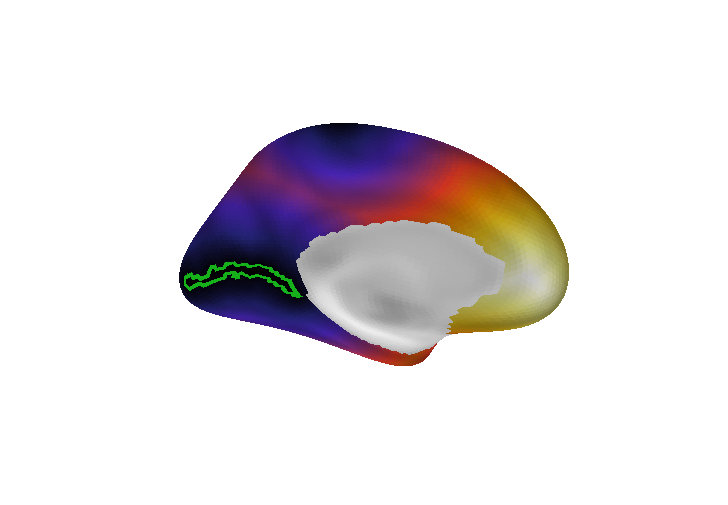

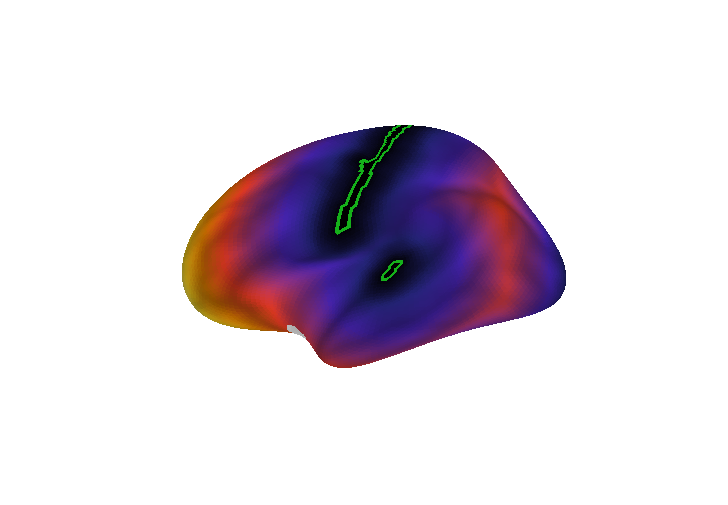

In [9]:
dist = sd.surfdist.dist_calc(surf, cort, np.where(seed_combined == 1)[0])

for azim in [0, 180]:
    test = plot.plot_surf_stat_map(surf[0], surf[1], dist, 
                                   mask=cort, labels=labels,
                                   bg_map=sulc, bg_on_stat=True, 
                                   azim=azim, cmap='CMRmap')

## distances separte for each modality, creating zones

In [10]:
import gdist
from surfdist.utils import surf_keep_cortex, translate_src, recort

vertices, triangles = surf_keep_cortex(surf, cort)

def dist_calc_fast(src, cortex, vertices, triangles, surf):
    src_new = translate_src(src, cortex)
    data = gdist.compute_gdist(vertices, triangles, source_indices=src_new)
    dist = recort(data, surf, cortex)
    del data
    return dist

In [11]:
# get labels per modality
dist_calc = dist_calc_fast(np.where(seeds_calc == 1)[0], cort, vertices, triangles, surf)
dist_centr = dist_calc_fast(np.where(seeds_centr == 1)[0], cort, vertices, triangles, surf)
dist_transv = dist_calc_fast(np.where(seeds_transv == 1)[0], cort, vertices, triangles, surf)

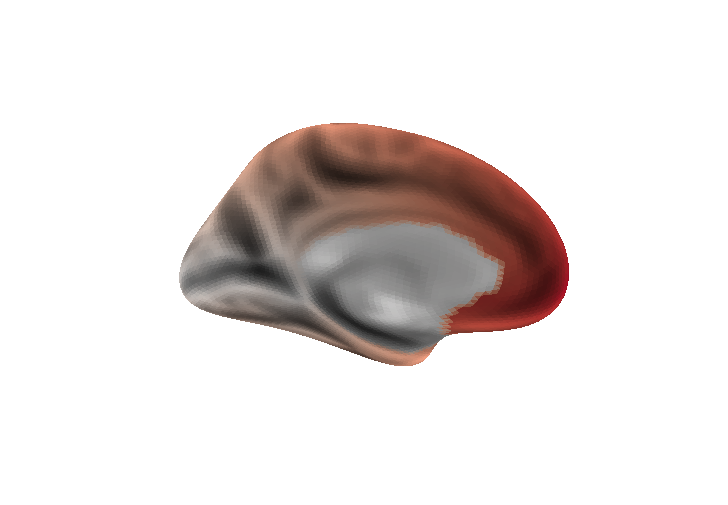

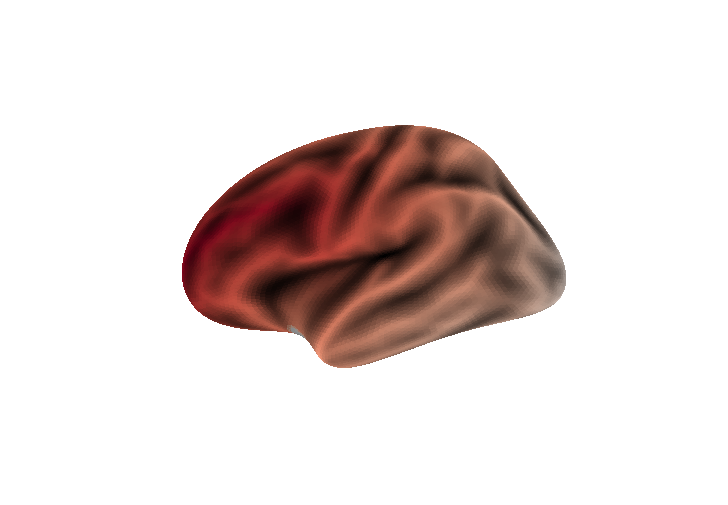

In [12]:
for azim in [0, 180]:
    img = sd.viz.viz(surf[0], surf[1], dist_calc, bg_map=sulc, bg_on_stat=True, azim=azim)

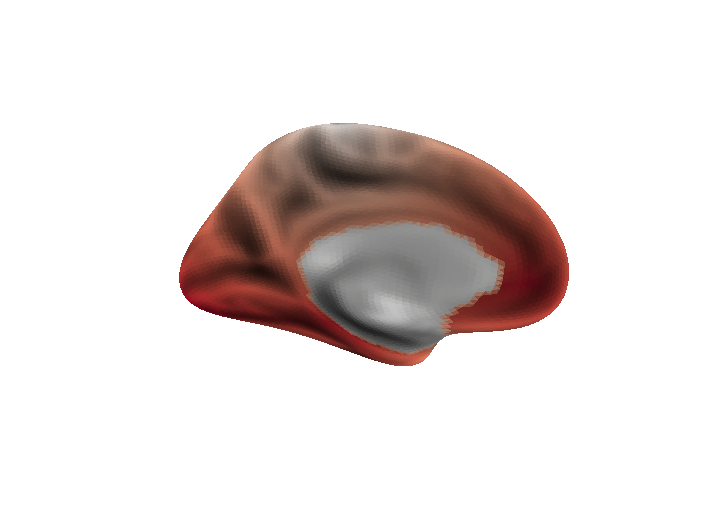

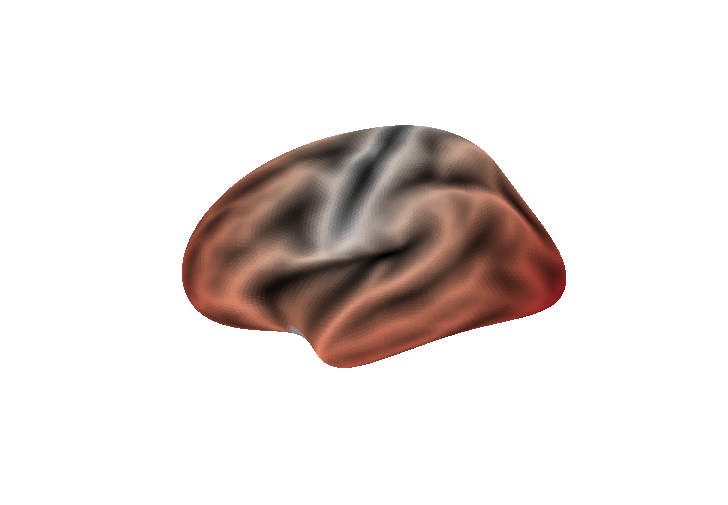

In [13]:
for azim in [0, 180]:
    img = sd.viz.viz(surf[0], surf[1], dist_centr, bg_map=sulc, bg_on_stat=True, azim=azim)

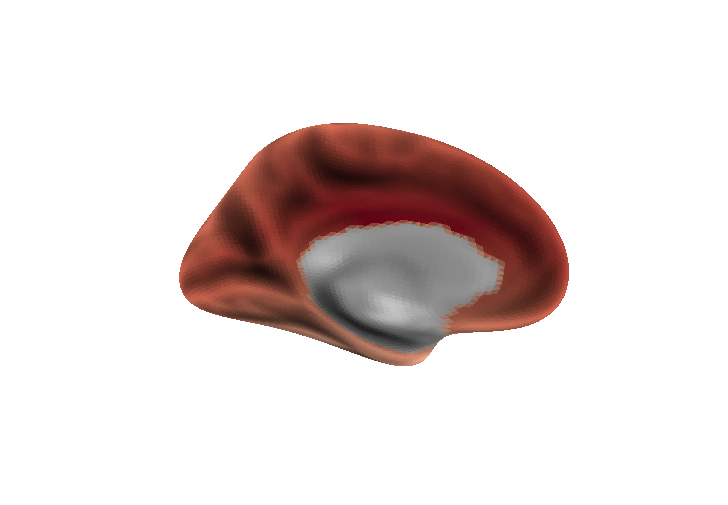

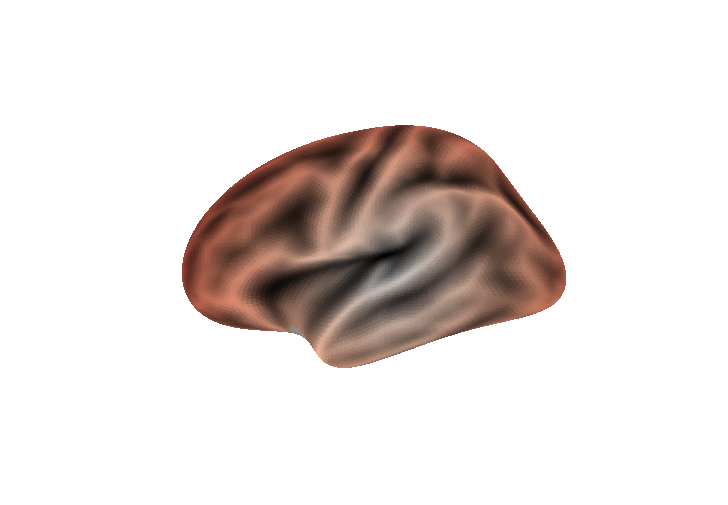

In [14]:
for azim in [0, 180]:
    img = sd.viz.viz(surf[0], surf[1], dist_transv, bg_map=sulc, bg_on_stat=True, azim=azim)

In [15]:
# zones
closest_modality = np.argmin(np.vstack((dist_calc, dist_centr, dist_transv)), axis=0)
closest_modality[cort] += 1

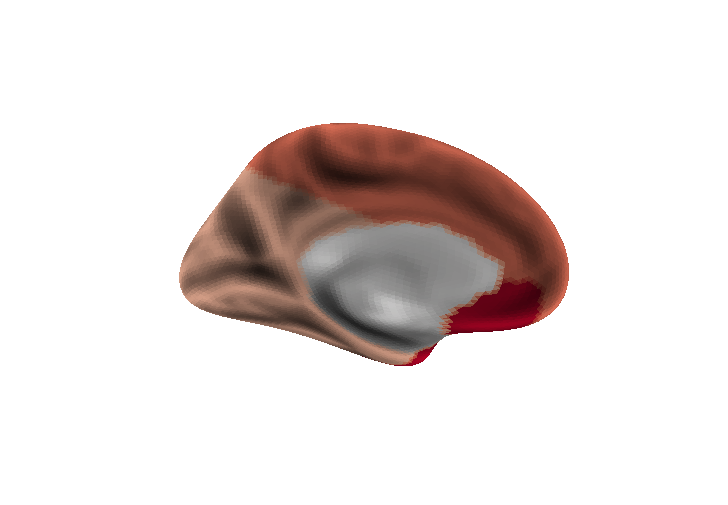

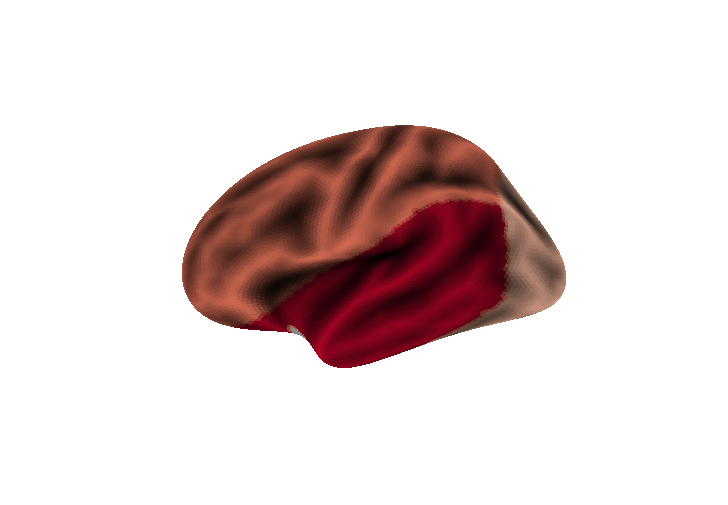

In [16]:
for azim in [0, 180]:
    img = sd.viz.viz(surf[0], surf[1], closest_modality, bg_map=sulc, bg_on_stat=True, azim=azim)

In [17]:
# is identical to dist from above
min_dist = np.min(np.vstack((dist_calc, dist_centr, dist_transv)), axis=0)

In [20]:
# using highest (equi)distance from visual to auditory/somotosensory to cut off distances to most frontal

cutoff = min_dist[closest_modality == 1].max()
mask = np.where(min_dist[cort] < cutoff)[0]

In [21]:
print cutoff

79.9304081722


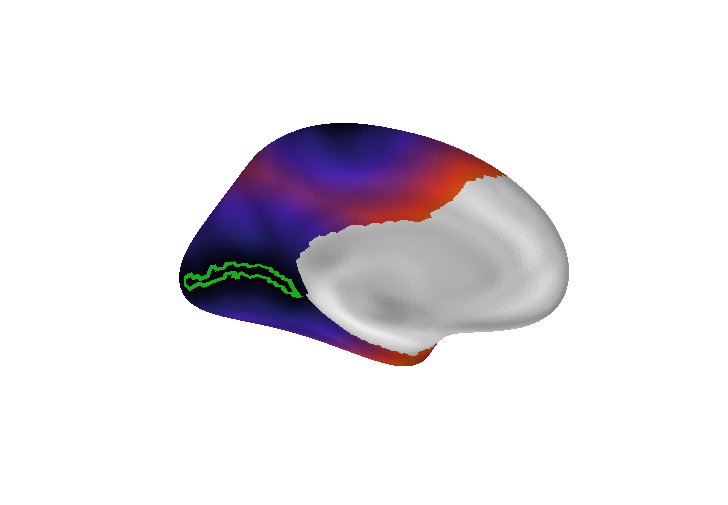

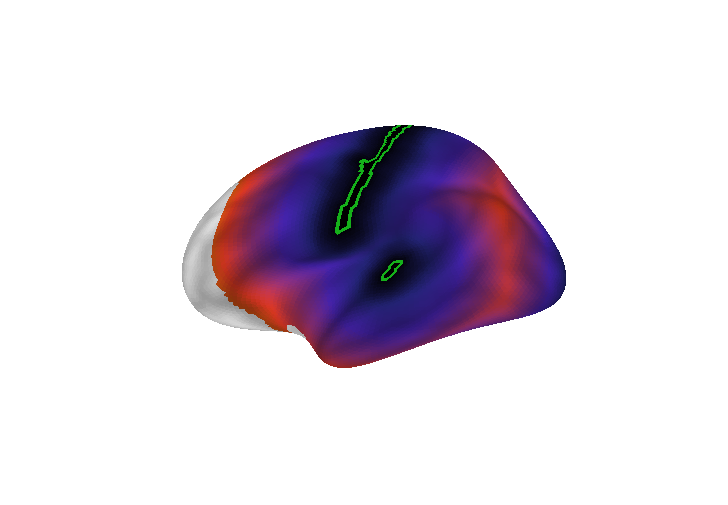

In [22]:
for azim in [0, 180]:
    img = plot.plot_surf_stat_map(surf[0], surf[1], dist, 
                                   mask=cort[mask], labels=labels,
                                   bg_map=sulc, bg_on_stat=True, 
                                   azim=azim, cmap='CMRmap')
    img.savefig('/scr/hunte1/sabine/distconnect/figures/images/3_distance_from_primary_%s.png' %azim, dpi=600)



thr: 70
slope: 0.300091073939


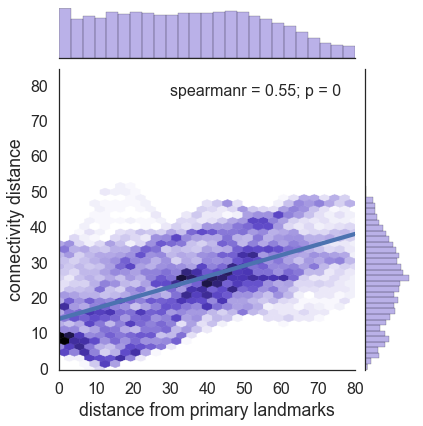



thr: 75
slope: 0.340030194689


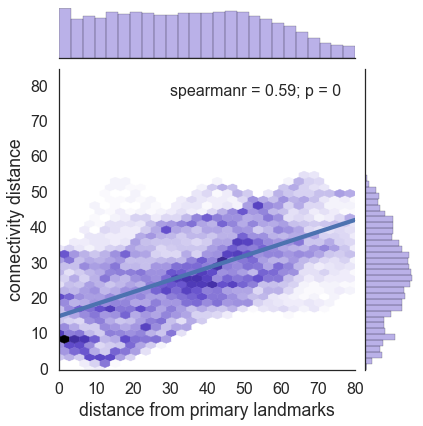



thr: 80
slope: 0.390132838344


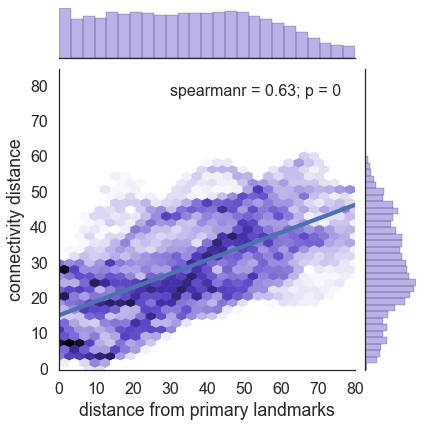



thr: 85
slope: 0.455317136319


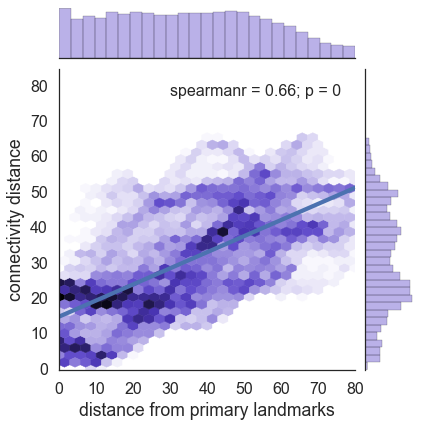



thr: 90
slope: 0.539495341018


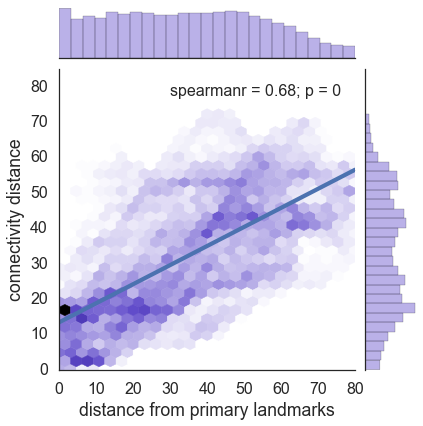



thr: 95
slope: 0.636402643018


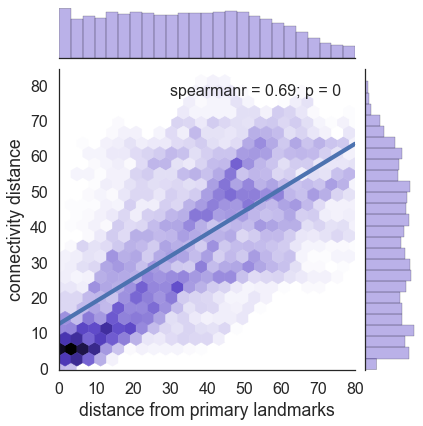



thr: 98
slope: 0.636217669769


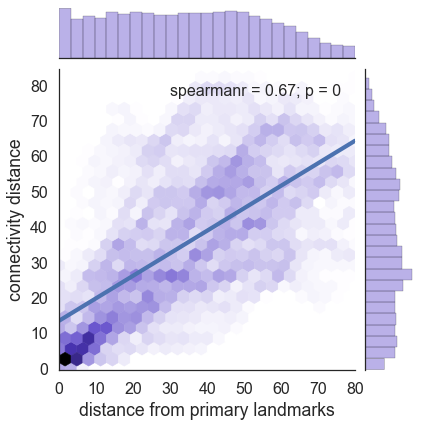

In [296]:
from sklearn import linear_model
from scipy.stats import spearmanr
thrs = np.unique(df_mm['threshold'])
residual_list = np.zeros((len(thrs), 10242))

for n_thr, thr in enumerate(thrs):
    print '\n\nthr: %s' % thr
    
    # data
    x = min_dist[cort][mask]
    y = np.array(df_mm['mean distance (geodesic) - group mean'][(df_mm['hemisphere'] == 'lh')
                                                               & (df_mm['threshold'] == thr)]).squeeze()[cort][mask] 
    y = y - y.min()
    
    # distribution
    g = sns.jointplot(x, y, kind="hex", color="#533cc6",
                     stat_func=spearmanr)

    # regression
    x_reg = np.expand_dims(x, axis=1)
    y_reg = np.expand_dims(y, axis=1)
    regr = linear_model.LinearRegression()
    regr.fit(x_reg, y_reg)

    # residuals
    residuals = y - regr.predict(x_reg).squeeze()
    residuals_remask = np.zeros(len(cort))
    residuals_remask[mask] = y - regr.predict(x_reg).squeeze()
    residuals_recort = np.zeros((10242))
    residual_list[n_thr][cort] = residuals_remask
    
    print 'slope: %s' %regr.coef_[0,0]
    sns.regplot(x_reg.squeeze(), regr.predict(x_reg).squeeze(), ax=g.ax_joint, 
                    scatter=False)
    g.set_axis_labels(xlabel='distance from primary landmarks', ylabel='connectivity distance')
    plt.ylim(0,85)
    plt.show()

### maps of residuals per threshold

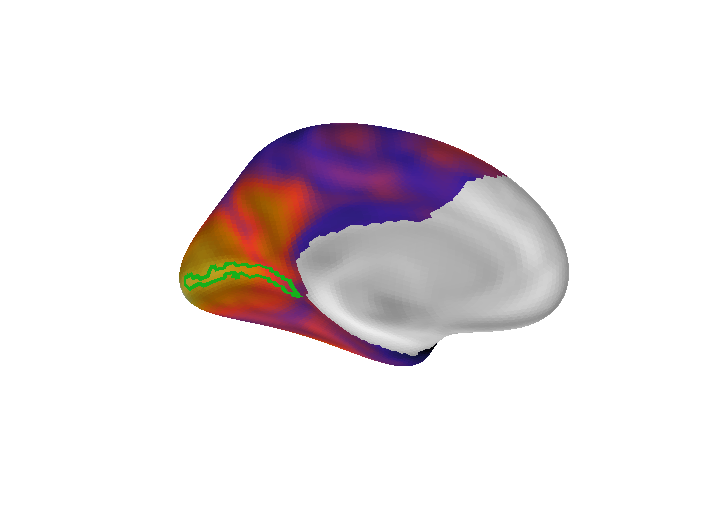

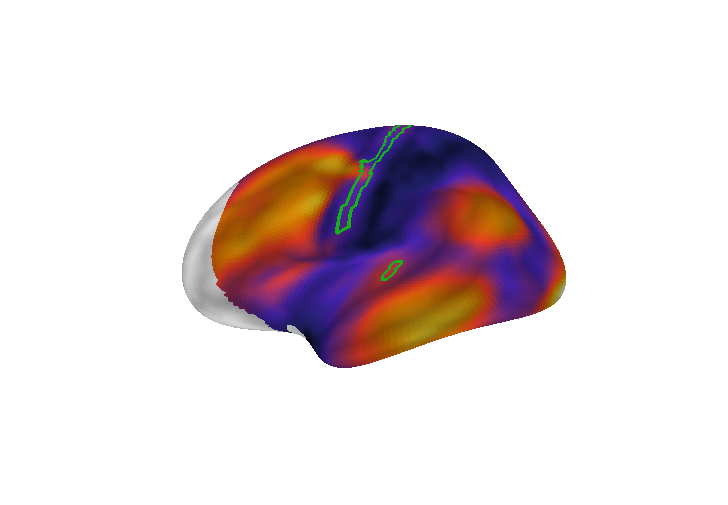

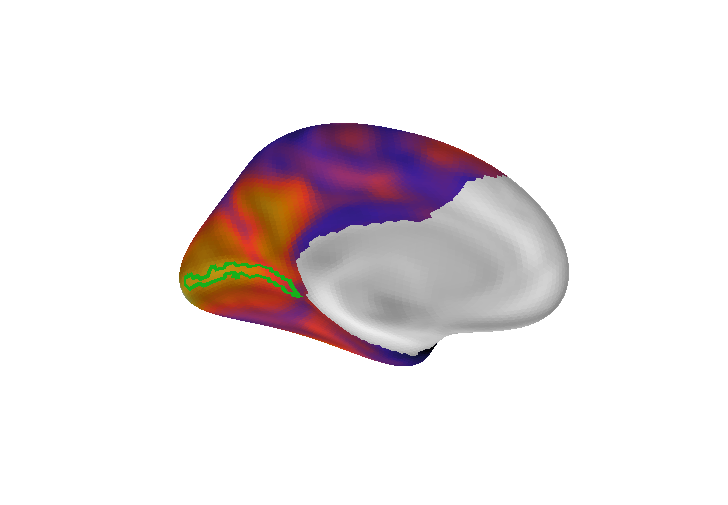

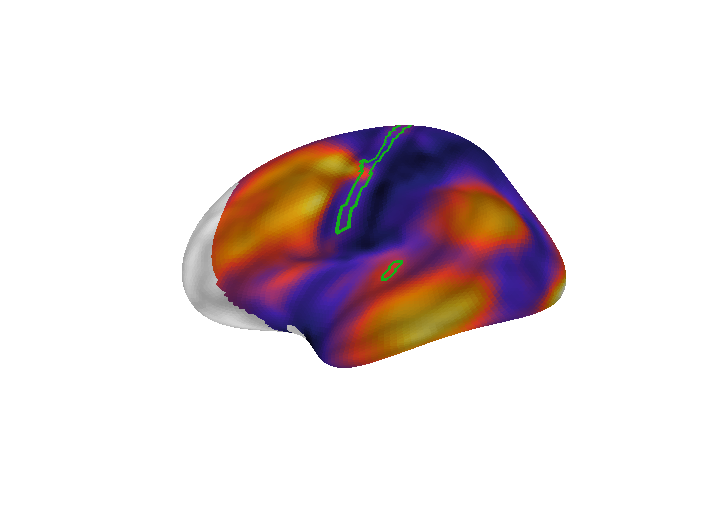

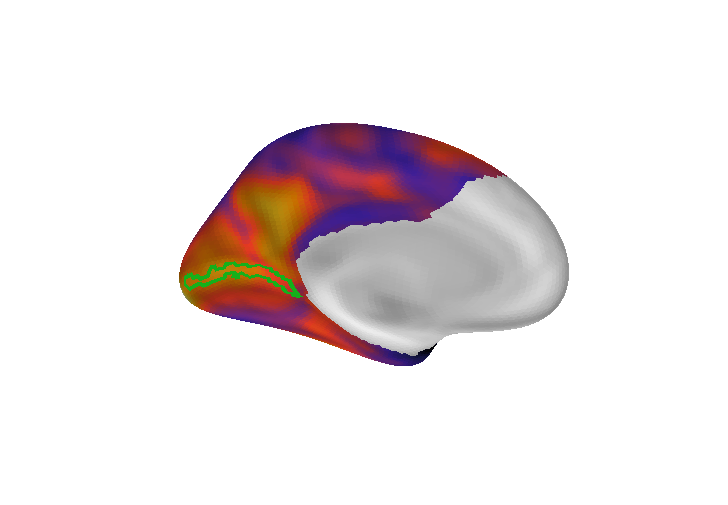

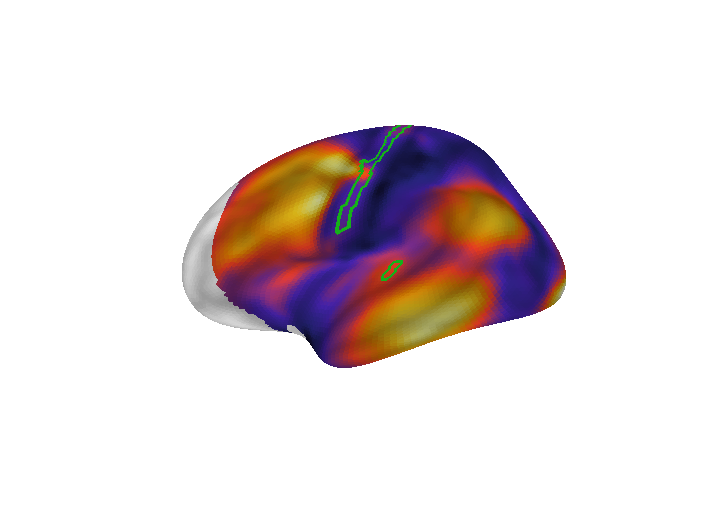

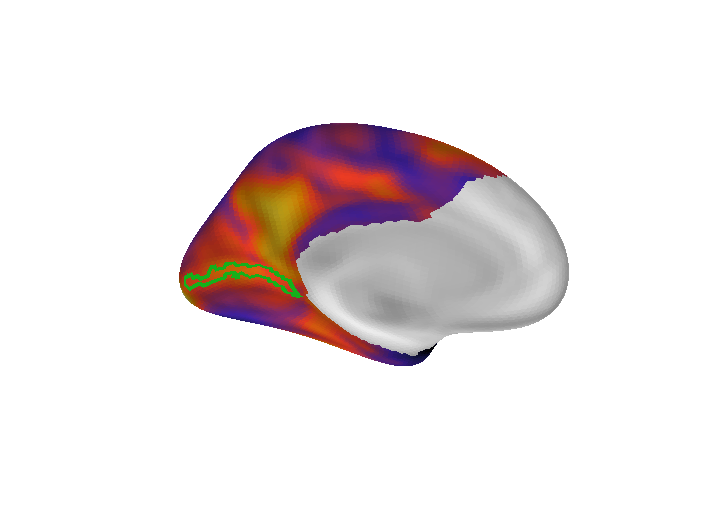

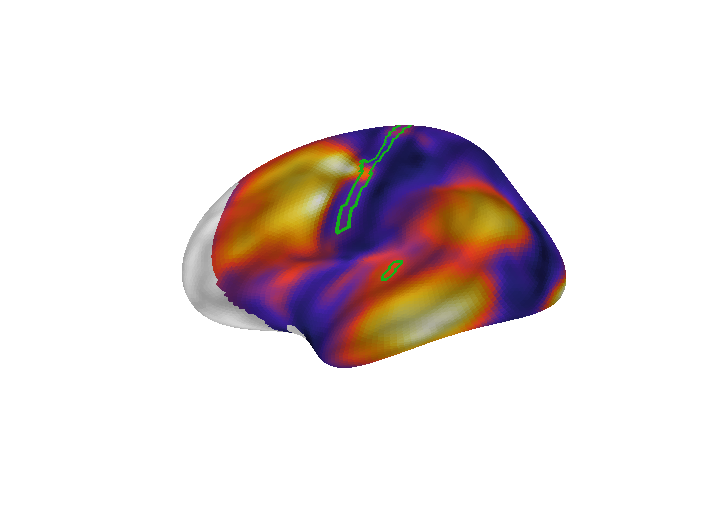

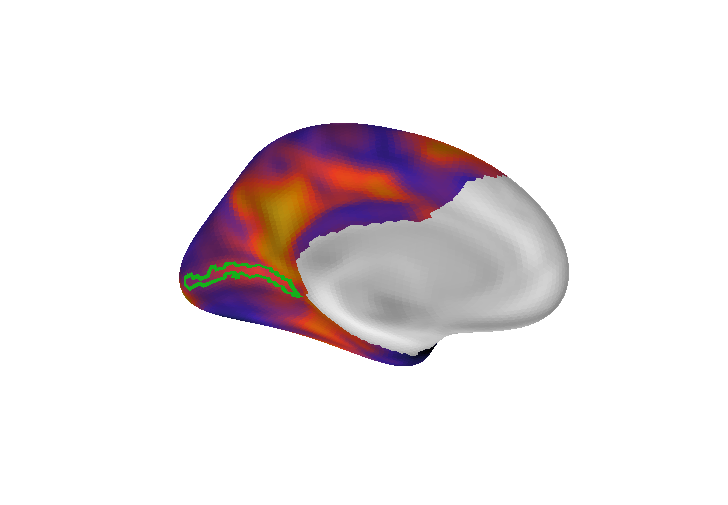

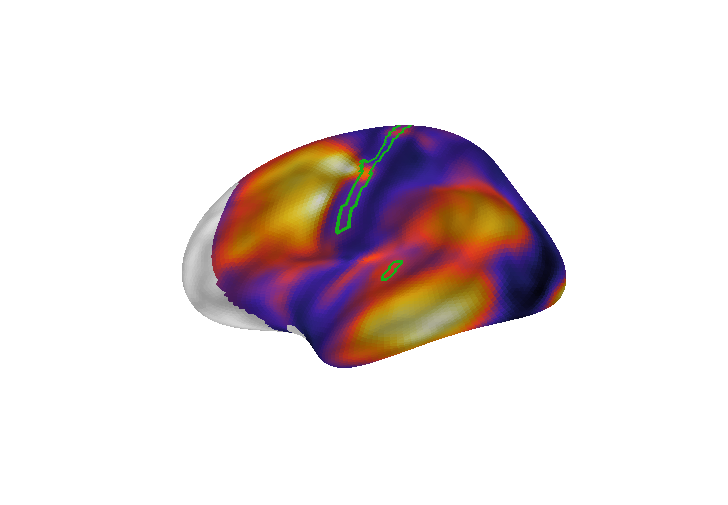

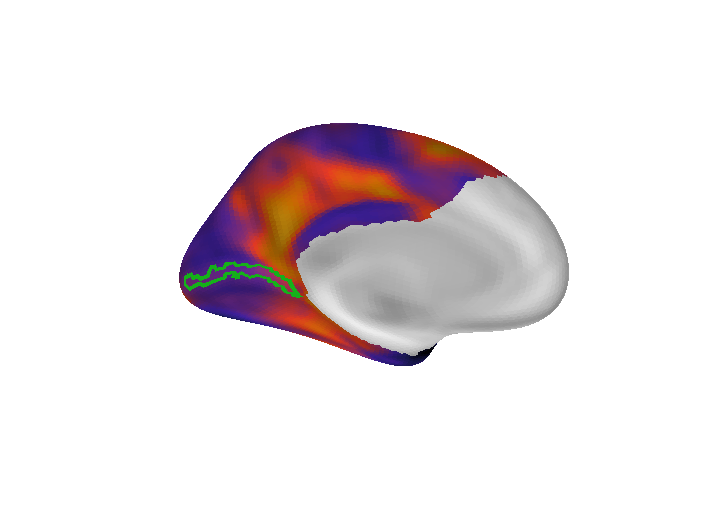

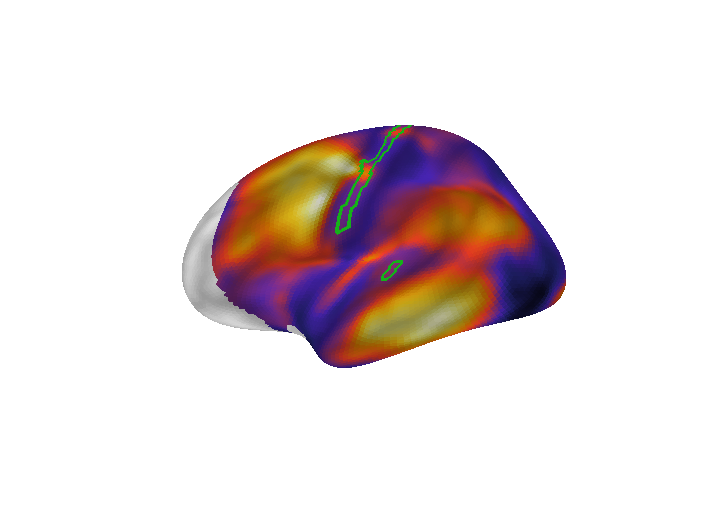

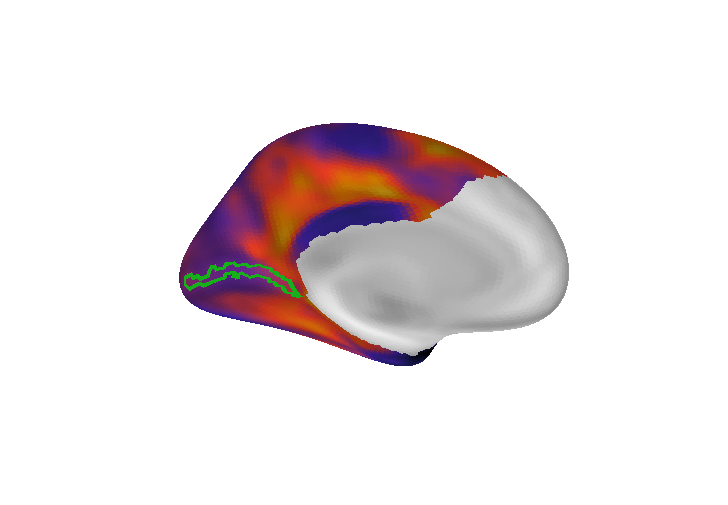

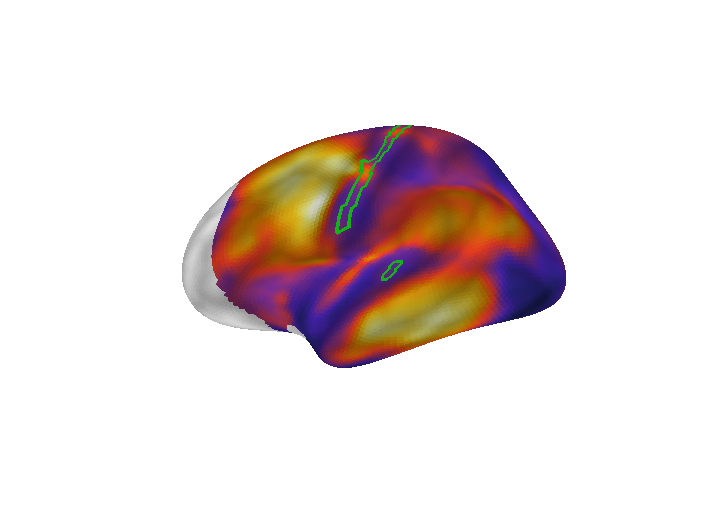

In [297]:
for residual_map in residual_list:
    for azim in [0, 180]:
        img = plot.plot_surf_stat_map(surf[0], surf[1], residual_map, 
                                       mask=cort[mask], labels=labels,
                                       bg_map=sulc, bg_on_stat=True, 
                                       azim=azim, cmap='CMRmap')

## separate for each modality

calcarine


/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel/__main__.py:30: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


slope: 0.537382256226


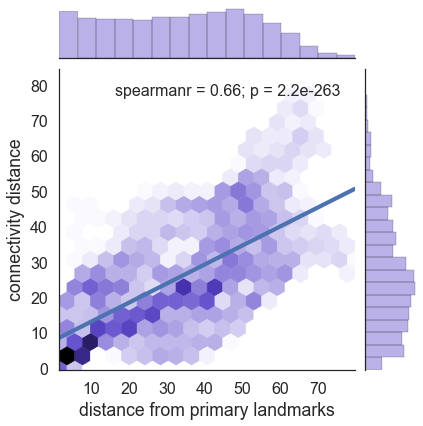

central
slope: 0.707512100591


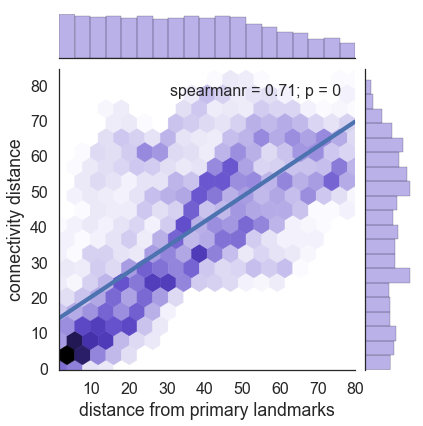

temporal transverse
slope: 0.475538167383


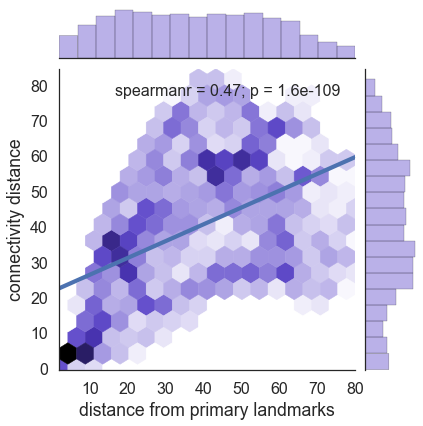

In [349]:
thr = '98'

for n_mod, mod in enumerate(['calcarine', 'central', 'temporal transverse']):
    print mod
    n_mod += 1
    
    
    # data
    x_temp = min_dist[cort][mask][closest_modality[cort][mask] == n_mod]
    x = x_temp[x_temp!=0]
    y = np.array(df_mm['mean distance (geodesic) - group mean'][(df_mm['hemisphere'] == 'lh')
                                                               & (df_mm['threshold'] == thr)]).squeeze()
    y = y[cort][mask][closest_modality[cort][mask] == n_mod]
    y = y[x_temp!=0]
    y = y - y.min()
    
    # distribution
    g = sns.jointplot(x, y, kind="hex", color="#533cc6",
                     stat_func=spearmanr)

    # regression
    x_reg = np.expand_dims(x, axis=1)
    y_reg = np.expand_dims(y, axis=1)
    regr = linear_model.LinearRegression()
    regr.fit(x_reg, y_reg)

    # residuals
    residuals = y - regr.predict(x_reg).squeeze()
    residuals_remask = np.zeros(len(cort))
    residuals_remask[mask] = y - regr.predict(x_reg).squeeze()
    residuals_recort = np.zeros((10242))
    residual_list[n_thr][cort] = residuals_remask
    
    print 'slope: %s' %regr.coef_[0,0]
    sns.regplot(x_reg.squeeze(), regr.predict(x_reg).squeeze(), ax=g.ax_joint, 
                    scatter=False)
    g.set_axis_labels(xlabel='distance from primary landmarks', ylabel='connectivity distance')
    plt.ylim(0,85)
    plt.show()



thr: 70
calcarine
slope: 0.0462268842565


/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel/__main__.py:44: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


central
slope: 0.444283129448
temporal transverse
slope: 0.257775416619


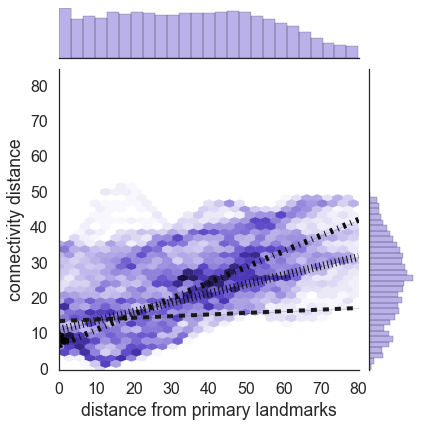



thr: 75
calcarine
slope: 0.0985919056479
central
slope: 0.482786249079
temporal transverse
slope: 0.276154340601


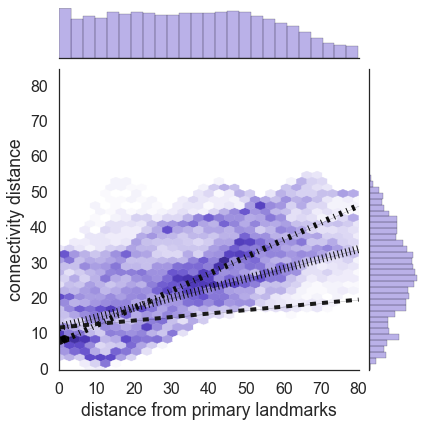



thr: 80
calcarine
slope: 0.171179667284
central
slope: 0.527798804848
temporal transverse
slope: 0.298652855448


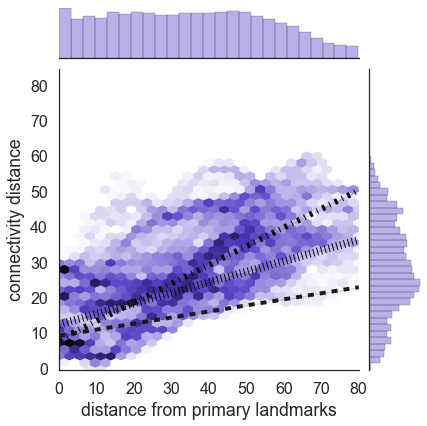



thr: 85
calcarine
slope: 0.274968269993
central
slope: 0.58125455821
temporal transverse
slope: 0.329874953757


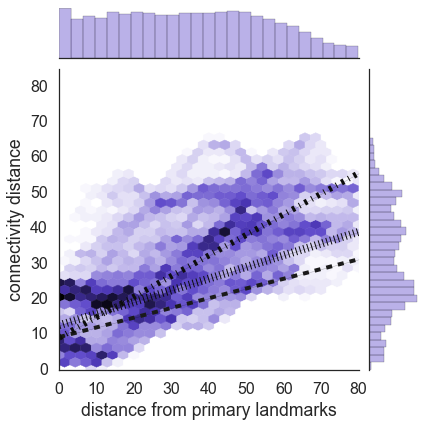



thr: 90
calcarine
slope: 0.413796973518
central
slope: 0.644693704953
temporal transverse
slope: 0.38232160643


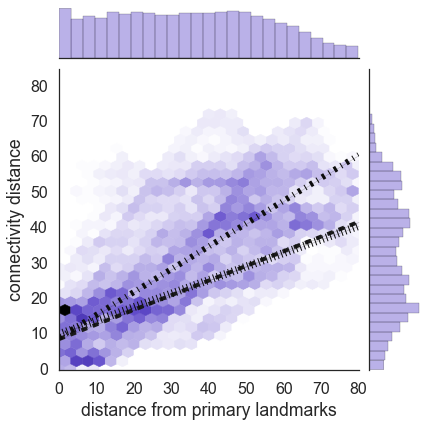



thr: 95
calcarine
slope: 0.563508931487
central
slope: 0.713391120912
temporal transverse
slope: 0.475832593826


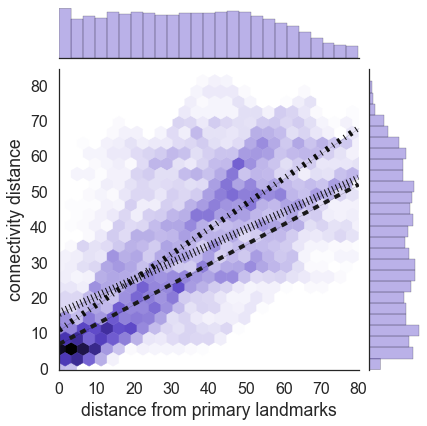



thr: 98
calcarine
slope: 0.54934565812
central
slope: 0.716581784491
temporal transverse
slope: 0.490935779814


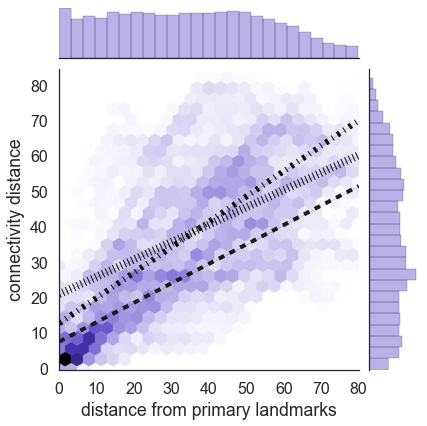

In [295]:
from sklearn import linear_model
from scipy.stats import spearmanr
thrs = np.unique(df_mm['threshold'])
residual_list = np.zeros((len(thrs), 10242))

line_style = ['solid', 'dashed', 'dashdot']
line_width = [3, 4, 6]
color_intens = ['.1', '.1', '.05']

for n_thr, thr in enumerate(thrs):
    print '\n\nthr: %s' % thr
    
    # data
    x = min_dist[cort][mask]
    y = np.array(df_mm['mean distance (geodesic) - group mean'][(df_mm['hemisphere'] == 'lh')
                                                               & (df_mm['threshold'] == thr)]).squeeze()[cort][mask] 
    y = y - y.min()
    
    # distribution
    g = sns.jointplot(x, y, kind="hex", color="#533cc6", stat_func=None,
                     xlim=(0,80), ylim=(0,85))

    
    for n_mod, mod in enumerate(['calcarine', 'central', 'temporal transverse']):
        print mod
        n_mod += 1

        # data
        x = min_dist[cort][mask][closest_modality[cort][mask] == n_mod]
        y = np.array(df_mm['mean distance (geodesic) - group mean'][(df_mm['hemisphere'] == 'lh')
                                                                   & (df_mm['threshold'] == thr)]).squeeze()
        y = y[cort][mask][closest_modality[cort][mask] == n_mod]
        y = y - y.min()
           
        # regression
        x_reg = np.expand_dims(x, axis=1)
        y_reg = np.expand_dims(y, axis=1)
        regr = linear_model.LinearRegression()
        regr.fit(x_reg, y_reg)


        print 'slope: %s' %regr.coef_[0,0]
        sns.regplot(x_reg.squeeze(), regr.predict(x_reg).squeeze(), ax=g.ax_joint, 
                    scatter=False,
                    color=color_intens[n_mod],
                    line_kws={'linestyle':line_style[n_mod],
                              'linewidth':line_width[n_mod]})
    
    g.set_axis_labels(xlabel='distance from primary landmarks', ylabel='connectivity distance')
    plt.show()

### without source areas in regression



thr: 70
calcarine
slope: 0.0471463175298
central
slope: 0.451434619837
temporal transverse
slope: 0.258838823292


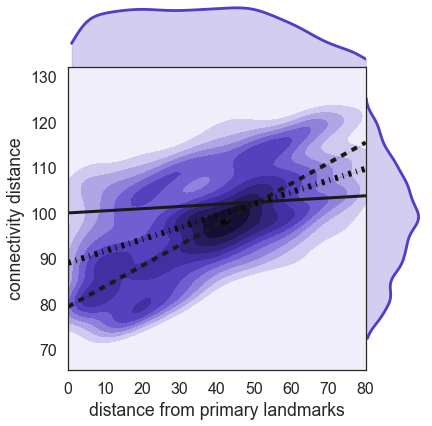



thr: 75
calcarine
slope: 0.101092486652
central
slope: 0.488484465226
temporal transverse
slope: 0.276892788361


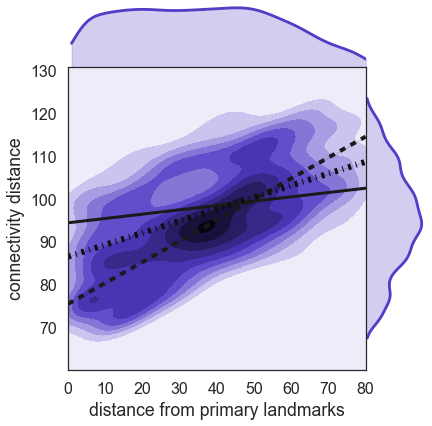



thr: 80
calcarine
slope: 0.175495891763
central
slope: 0.531509482049
temporal transverse
slope: 0.298667804491


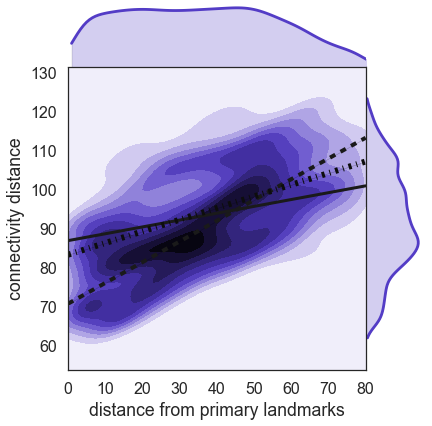



thr: 85
calcarine
slope: 0.280599330636
central
slope: 0.58265096228
temporal transverse
slope: 0.328474688558


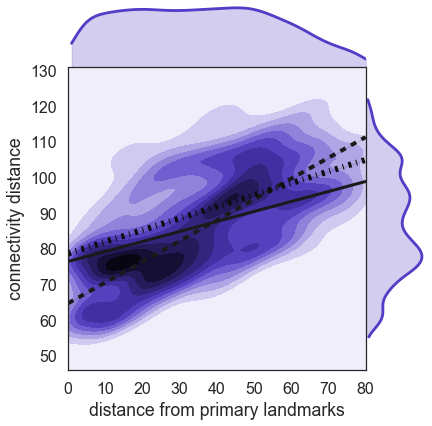



thr: 90
calcarine
slope: 0.417173886252
central
slope: 0.643944454962
temporal transverse
slope: 0.378026746173


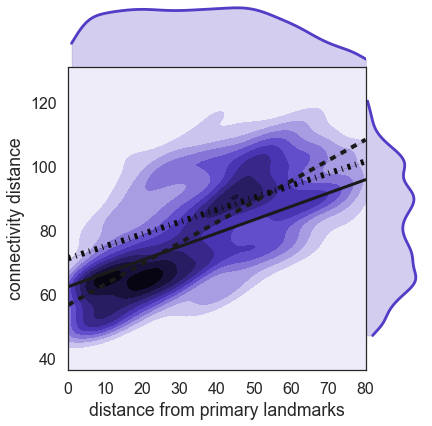



thr: 95
calcarine
slope: 0.554600067793
central
slope: 0.709877827667
temporal transverse
slope: 0.465291805674


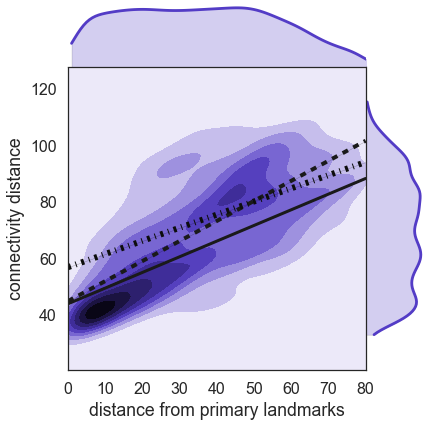



thr: 98
calcarine
slope: 0.537382256226
central
slope: 0.707512100591
temporal transverse
slope: 0.475538167383


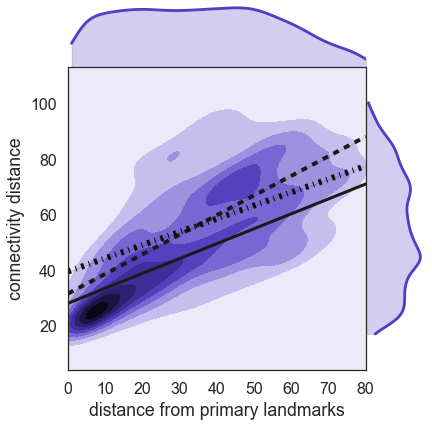

In [369]:
from sklearn import linear_model
from scipy.stats import spearmanr
thrs = np.unique(df_mm['threshold'])
residual_list = np.zeros((len(thrs), 10242))

line_style = ['solid', 'dashed', 'dashdot']
line_width = [3, 4, 6]
color_intens = ['.1', '.1', '.05']

for n_thr, thr in enumerate(thrs):
    print '\n\nthr: %s' % thr
    
    # data
    x_temp = min_dist[cort][mask]
    x = x_temp[x_temp!=0.]
    y = np.array(df_mm['mean distance (geodesic) - group mean'][(df_mm['hemisphere'] == 'lh')
                                                               & (df_mm['threshold'] == thr)]).squeeze()[cort][mask] 
    y = y[x_temp!=0.]
    #y = y - y.min()
    
    # distribution
    g = sns.jointplot(x, y, kind="kde", color="#533cc6", stat_func=None, space=0, xlim=(0,80))
                     #xlim=(0,80), ylim=(15,130))

    
    for n_mod, mod in enumerate(['calcarine', 'central', 'temporal transverse']):
        print mod
        n_mod += 1

        # data
        x_temp = min_dist[cort][mask][closest_modality[cort][mask] == n_mod]
        x = x_temp[x_temp!=0.]
        y = np.array(df_mm['mean distance (geodesic) - group mean'][(df_mm['hemisphere'] == 'lh')
                                                                   & (df_mm['threshold'] == thr)]).squeeze()
        y = y[cort][mask][closest_modality[cort][mask] == n_mod]
        y = y[x_temp!=0.]
        #y = y - y.min()
           
        # regression
        x_reg = np.expand_dims(x, axis=1)
        y_reg = np.expand_dims(y, axis=1)
        regr = linear_model.LinearRegression()
        regr.fit(x_reg, y_reg)


        print 'slope: %s' %regr.coef_[0,0]
        sns.regplot(x_reg.squeeze(), regr.predict(x_reg).squeeze(), ax=g.ax_joint, 
                    scatter=False,
                    color=color_intens[n_mod-1],
                    line_kws={'linestyle':line_style[n_mod-1],
                              'linewidth':line_width[n_mod-1]})
    
    g.set_axis_labels(xlabel='distance from primary landmarks', ylabel='connectivity distance')
    g.savefig('/scr/hunte1/sabine/distconnect/figures/images/3_corr_%s.png' %thr, dpi=600)
    plt.show()



thr: 70
slope: 0.305728198944


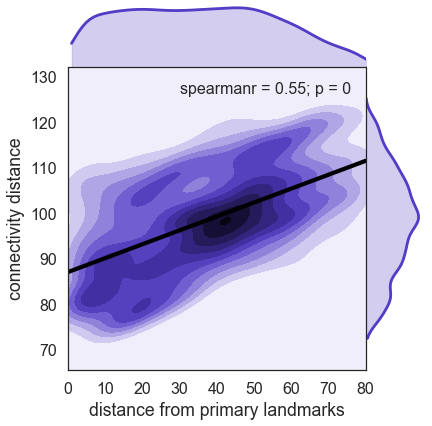



thr: 75
slope: 0.344495958664


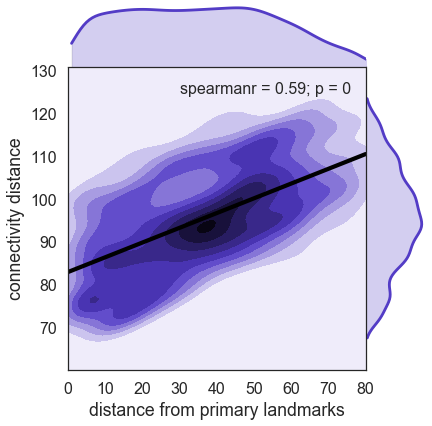



thr: 80
slope: 0.392873897691


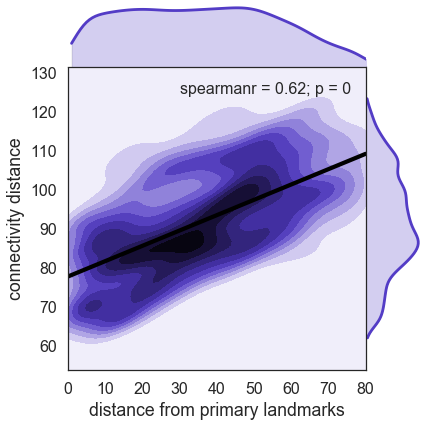



thr: 85
slope: 0.45559506534


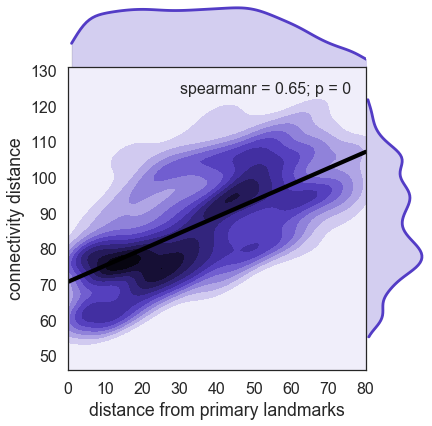



thr: 90
slope: 0.53613315244


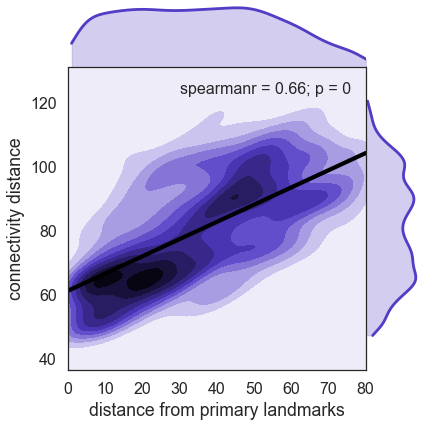



thr: 95
slope: 0.626687758498


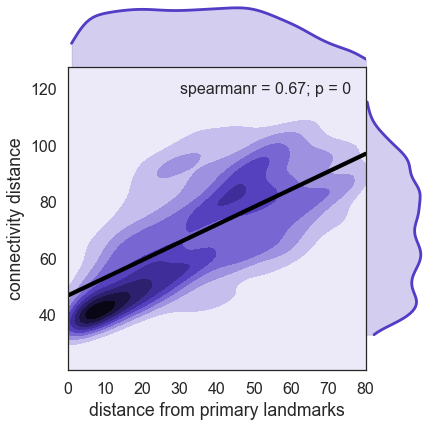



thr: 98
slope: 0.622709973339


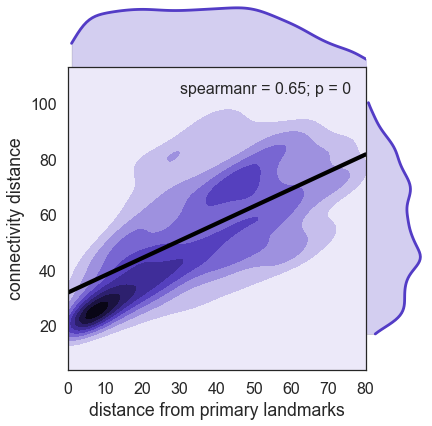

In [28]:
from sklearn import linear_model
from scipy.stats import spearmanr
thrs = np.unique(df_mm['threshold'])
residual_list = np.zeros((len(thrs), 10242))

line_style = ['solid', 'dashed', 'dashdot']
line_width = [3, 4, 6]
color_intens = ['.1', '.1', '.05']

for n_thr, thr in enumerate(thrs):
    print '\n\nthr: %s' % thr
    
    # data
    x_temp = min_dist[cort][mask]
    x = x_temp[x_temp!=0.]
    y = np.array(df_mm['mean distance (geodesic) - group mean'][(df_mm['hemisphere'] == 'lh')
                                                               & (df_mm['threshold'] == thr)]).squeeze()[cort][mask] 
    y = y[x_temp!=0.]
    #y = y - y.min()
    
    # distribution
    g = sns.jointplot(x, y, kind="kde", color="#533cc6", stat_func=spearmanr, space=0, xlim=(0,80))
                     #xlim=(0,80), ylim=(15,130))

    
    

    # data
    x_temp = min_dist[cort][mask]
    x = x_temp[x_temp!=0.]
    y = np.array(df_mm['mean distance (geodesic) - group mean'][(df_mm['hemisphere'] == 'lh')
                                                               & (df_mm['threshold'] == thr)]).squeeze()
    y = y[cort][mask]
    y = y[x_temp!=0.]
    #y = y - y.min()

    # regression
    x_reg = np.expand_dims(x, axis=1)
    y_reg = np.expand_dims(y, axis=1)
    regr = linear_model.LinearRegression()
    regr.fit(x_reg, y_reg)


    print 'slope: %s' %regr.coef_[0,0]
    sns.regplot(x_reg.squeeze(), regr.predict(x_reg).squeeze(), ax=g.ax_joint, 
                scatter=False,
                color='black')
                #line_kws={'linestyle':'solid', 'linewidth':'.1'})
    
    g.set_axis_labels(xlabel='distance from primary landmarks', ylabel='connectivity distance')
    #g.savefig('/scr/hunte1/sabine/distconnect/figures/images/3_corr_%s.png' %thr, dpi=600)
    plt.show()

In [ ]:
from sklearn import linear_model
from scipy.stats import spearmanr
thrs = np.unique(df_mm['threshold'])
residual_list = np.zeros((len(thrs), 10242))

for n_thr, thr in enumerate(thrs):
    print '\n\nthr: %s' % thr
    
    # data
    x = min_dist[cort][mask]
    y = np.array(df_mm['mean distance (geodesic) - group mean'][(df_mm['hemisphere'] == 'lh')
                                                               & (df_mm['threshold'] == thr)]).squeeze()[cort][mask] 
    y = y - y.min()
    
    # distribution
    g = sns.jointplot(x, y, kind="hex", color="#533cc6",
                     stat_func=spearmanr)

    # regression
    x_reg = np.expand_dims(x, axis=1)
    y_reg = np.expand_dims(y, axis=1)
    regr = linear_model.LinearRegression()
    regr.fit(x_reg, y_reg)

    # residuals
    residuals = y - regr.predict(x_reg).squeeze()
    residuals_remask = np.zeros(len(cort))
    residuals_remask[mask] = y - regr.predict(x_reg).squeeze()
    residuals_recort = np.zeros((10242))
    residual_list[n_thr][cort] = residuals_remask
    
    print 'slope: %s' %regr.coef_[0,0]
    sns.regplot(x_reg.squeeze(), regr.predict(x_reg).squeeze(), ax=g.ax_joint, 
                    scatter=False)
    g.set_axis_labels(xlabel='distance from primary landmarks', ylabel='connectivity distance')
    plt.ylim(0,85)
    plt.show()

### Euclidean

[[ 0.29973321]]


(0, 90)

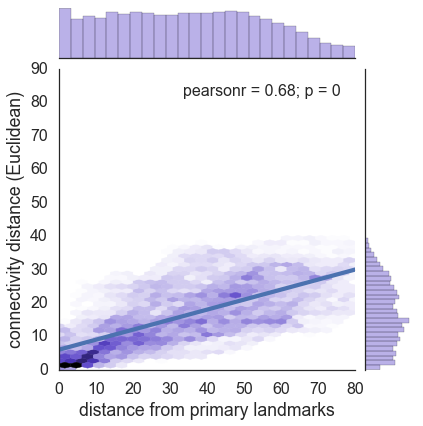

In [158]:
x = min_dist[cort][mask]
y = np.array(df_mm['mean distance (euclidean) - group mean'][(df_mm['hemisphere'] == 'lh')]).squeeze()[cort][mask] 
y = y - y.min()

g = sns.jointplot(x, y, kind="hex", color="#533cc6")

g.set_axis_labels(xlabel='distance from primary landmarks', ylabel='connectivity distance (Euclidean)')

x_reg = np.expand_dims(x, axis=1)
y_reg = np.expand_dims(y, axis=1)
regr = linear_model.LinearRegression()
regr.fit(x_reg, y_reg)


sns.regplot(x_reg.squeeze(), regr.predict(x_reg).squeeze(), ax=g.ax_joint, 
                scatter=False)

print regr.coef_

plt.ylim(0,90)



thr: 70
calcarine
slope: 0.0249661475771
central
slope: 0.248266805532
temporal transverse
slope: 0.307103053625


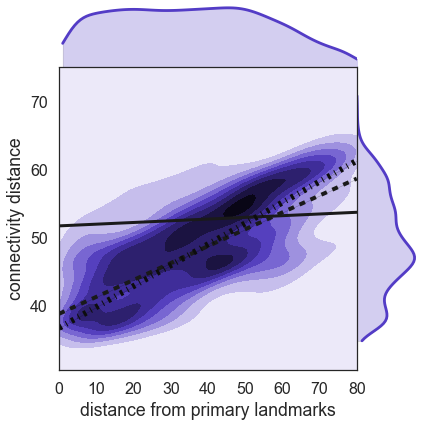



thr: 75
calcarine
slope: 0.0515011891958
central
slope: 0.261189161149
temporal transverse
slope: 0.308279763153


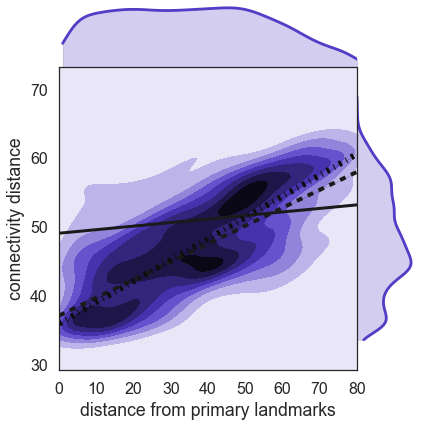



thr: 80
calcarine
slope: 0.0867168542432
central
slope: 0.275698751756
temporal transverse
slope: 0.307691289307


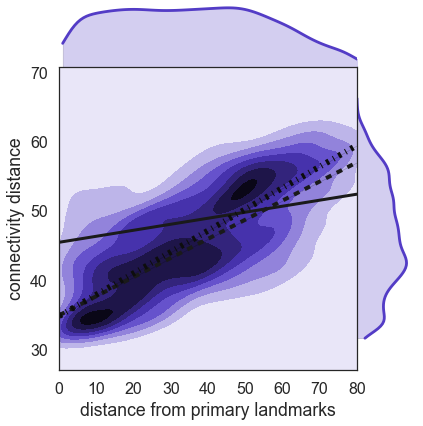



thr: 85
calcarine
slope: 0.134922226972
central
slope: 0.293078485313
temporal transverse
slope: 0.305186156765


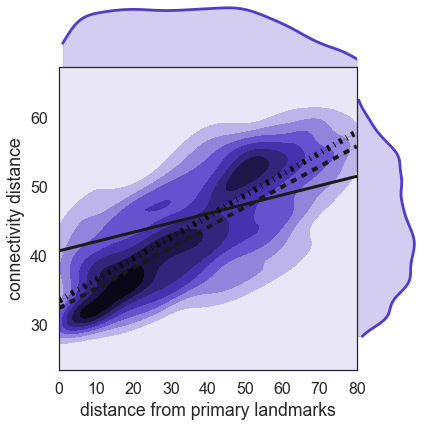



thr: 90
calcarine
slope: 0.195405696381
central
slope: 0.315011998289
temporal transverse
slope: 0.30158067428


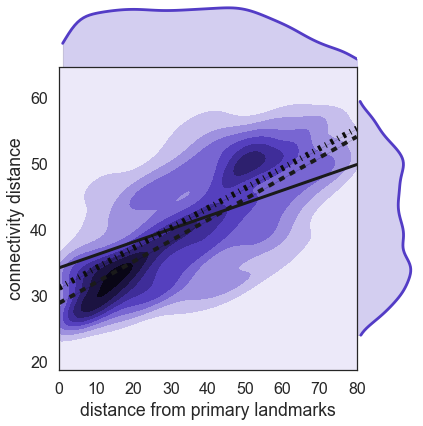



thr: 95
calcarine
slope: 0.2531572942
central
slope: 0.339390479371
temporal transverse
slope: 0.291860646692


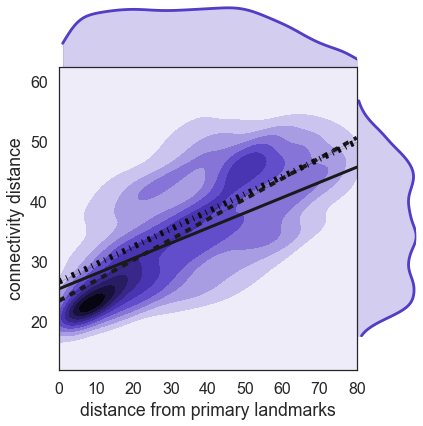



thr: 98
calcarine
slope: 0.244975618549
central
slope: 0.334524868865
temporal transverse
slope: 0.245847716202


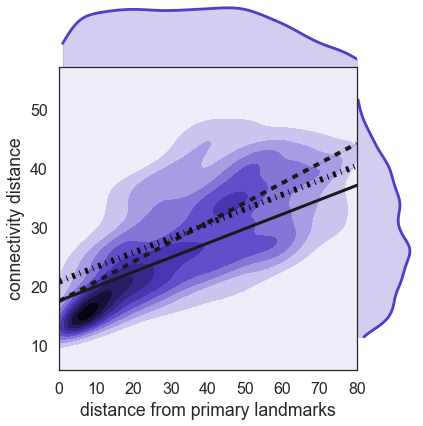

In [368]:
from sklearn import linear_model
from scipy.stats import spearmanr
thrs = np.unique(df_mm['threshold'])
residual_list = np.zeros((len(thrs), 10242))

line_style = ['solid', 'dashed', 'dashdot']
line_width = [3, 4, 6]
color_intens = ['.1', '.1', '.05']

for n_thr, thr in enumerate(thrs):
    print '\n\nthr: %s' % thr
    
    # data
    x_temp = min_dist[cort][mask]
    x = x_temp[x_temp!=0.]
    y = np.array(df_mm['mean distance (euclidean) - group mean'][(df_mm['hemisphere'] == 'lh')
                                                               & (df_mm['threshold'] == thr)]).squeeze()[cort][mask] 
    y = y[x_temp!=0.]
    #y = y - y.min()
    
    # distribution
    g = sns.jointplot(x, y, kind="kde", color="#533cc6", stat_func=None, space=0, xlim=(0,80))
                     #xlim=(0,80), ylim=(15,130))

    
    for n_mod, mod in enumerate(['calcarine', 'central', 'temporal transverse']):
        print mod
        n_mod += 1

        # data
        x_temp = min_dist[cort][mask][closest_modality[cort][mask] == n_mod]
        x = x_temp[x_temp!=0.]
        y = np.array(df_mm['mean distance (euclidean) - group mean'][(df_mm['hemisphere'] == 'lh')
                                                                   & (df_mm['threshold'] == thr)]).squeeze()
        y = y[cort][mask][closest_modality[cort][mask] == n_mod]
        y = y[x_temp!=0.]
        #y = y - y.min()
           
        # regression
        x_reg = np.expand_dims(x, axis=1)
        y_reg = np.expand_dims(y, axis=1)
        regr = linear_model.LinearRegression()
        regr.fit(x_reg, y_reg)


        print 'slope: %s' %regr.coef_[0,0]
        sns.regplot(x_reg.squeeze(), regr.predict(x_reg).squeeze(), ax=g.ax_joint, 
                    scatter=False,
                    color=color_intens[n_mod-1],
                    line_kws={'linestyle':line_style[n_mod-1],
                              'linewidth':line_width[n_mod-1]})
    
    g.set_axis_labels(xlabel='distance from primary landmarks', ylabel='connectivity distance')
    plt.show()

# variance in distances across nodes (fault!!! not thresholded by fc)

In [243]:
n_bins = 40
nodes_dist_bins = np.zeros((len(cort), n_bins))

for n, node in enumerate(cort):
    nodes_dist_bins[n] = np.histogram(gr_dist_lh[node][cort], bins=n_bins, range=(0,260))[0]

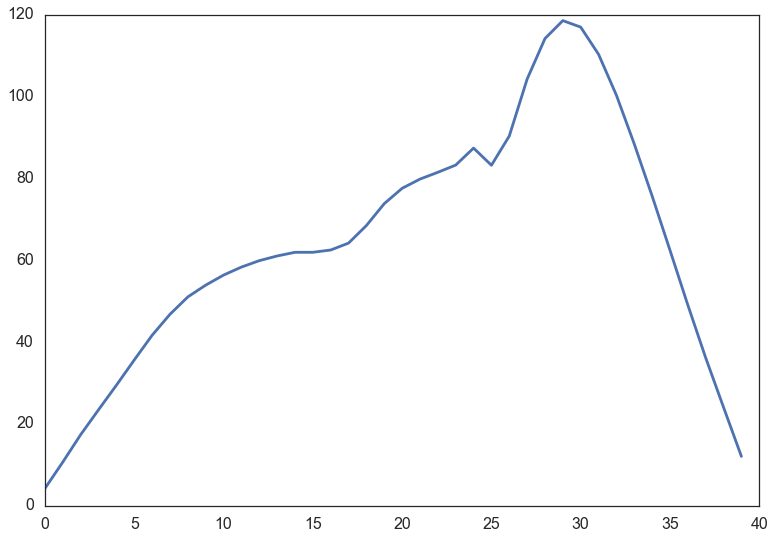

In [244]:
plt.plot(nodes_dist_bins.std(axis=0))